## Importing Libraries

In [1]:
# Supress Warnings

import warnings

warnings.filterwarnings("ignore")

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Reading Dataset and understanding data

In [3]:
# Reading the data

df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# describing the columns of dataframe
print(df.shape)
df.describe()

(730, 16)


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Cleaning Data

In [5]:
# checking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# CHecking for duplicate rows
df.duplicated().sum()

0

No duplicates found

### Dropping columns

In [7]:
# Droping instant column as it is index column
df.drop(["instant"], axis=1, inplace=True)

# Dropping dteday as same information can be obtained by month and weekday columns
df.drop(["dteday"], axis=1, inplace=True)

# Dropping casual and registered columns as sum of these two column is equal to CNT column

df.drop(["casual"], axis=1, inplace=True)
df.drop(["registered"], axis=1, inplace=True)

### Handling Outliers

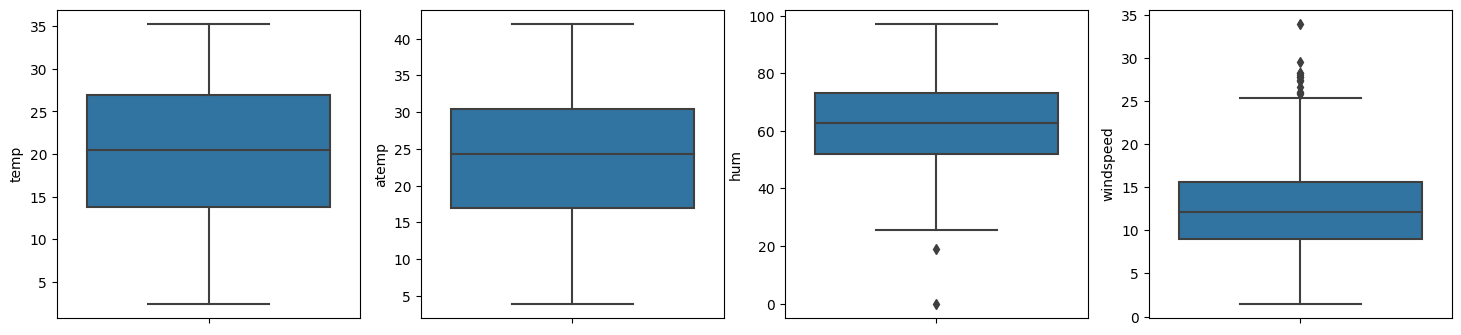

In [20]:
# Draw box plots for indepent variables with continuous values
cols = ["temp", "atemp", "hum", "windspeed"]
plt.figure(figsize=(18, 4))

i = 1
for col in cols:
    plt.subplot(1, 4, i)
    sns.boxplot(y=col, data=df)
    i += 1

Don't found any outliers

In [8]:
# converting to categorical column
df.season.replace(
    {1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace=True
)

df.weathersit.replace(
    {1: "good", 2: "moderate", 3: "bad", 4: "severe"}, inplace=True
)

df.mnth.replace(
    {
        1: "jan",
        2: "feb",
        3: "mar",
        4: "apr",
        5: "may",
        6: "jun",
        7: "jul",
        8: "aug",
        9: "sept",
        10: "oct",
        11: "nov",
        12: "dec",
    },
    inplace=True,
)

df.weekday.replace(
    {0: "sun", 1: "mon", 2: "tue", 3: "wed", 4: "thu", 5: "fri", 6: "sat"},
    inplace=True,
)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


## EDA

<Figure size 1500x3000 with 0 Axes>

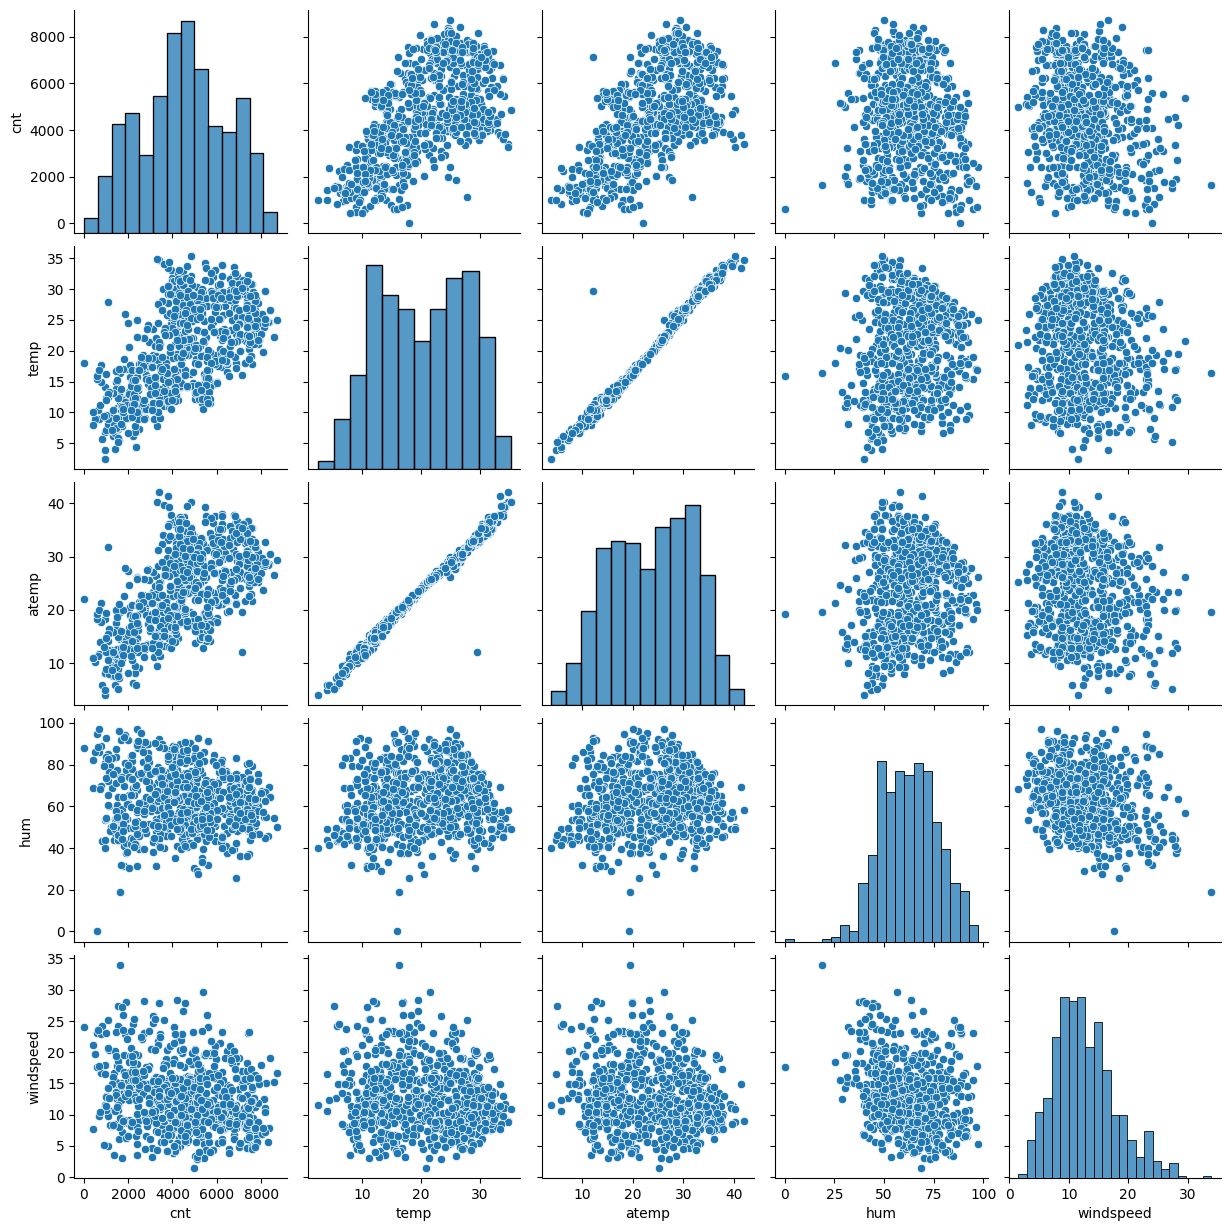

In [9]:
# Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize=(15, 30))
sns.pairplot(data=df, vars=["cnt", "temp", "atemp", "hum", "windspeed"])
plt.show()

variable temp and atemp are highly correlated with each other

<Figure size 2000x1500 with 0 Axes>

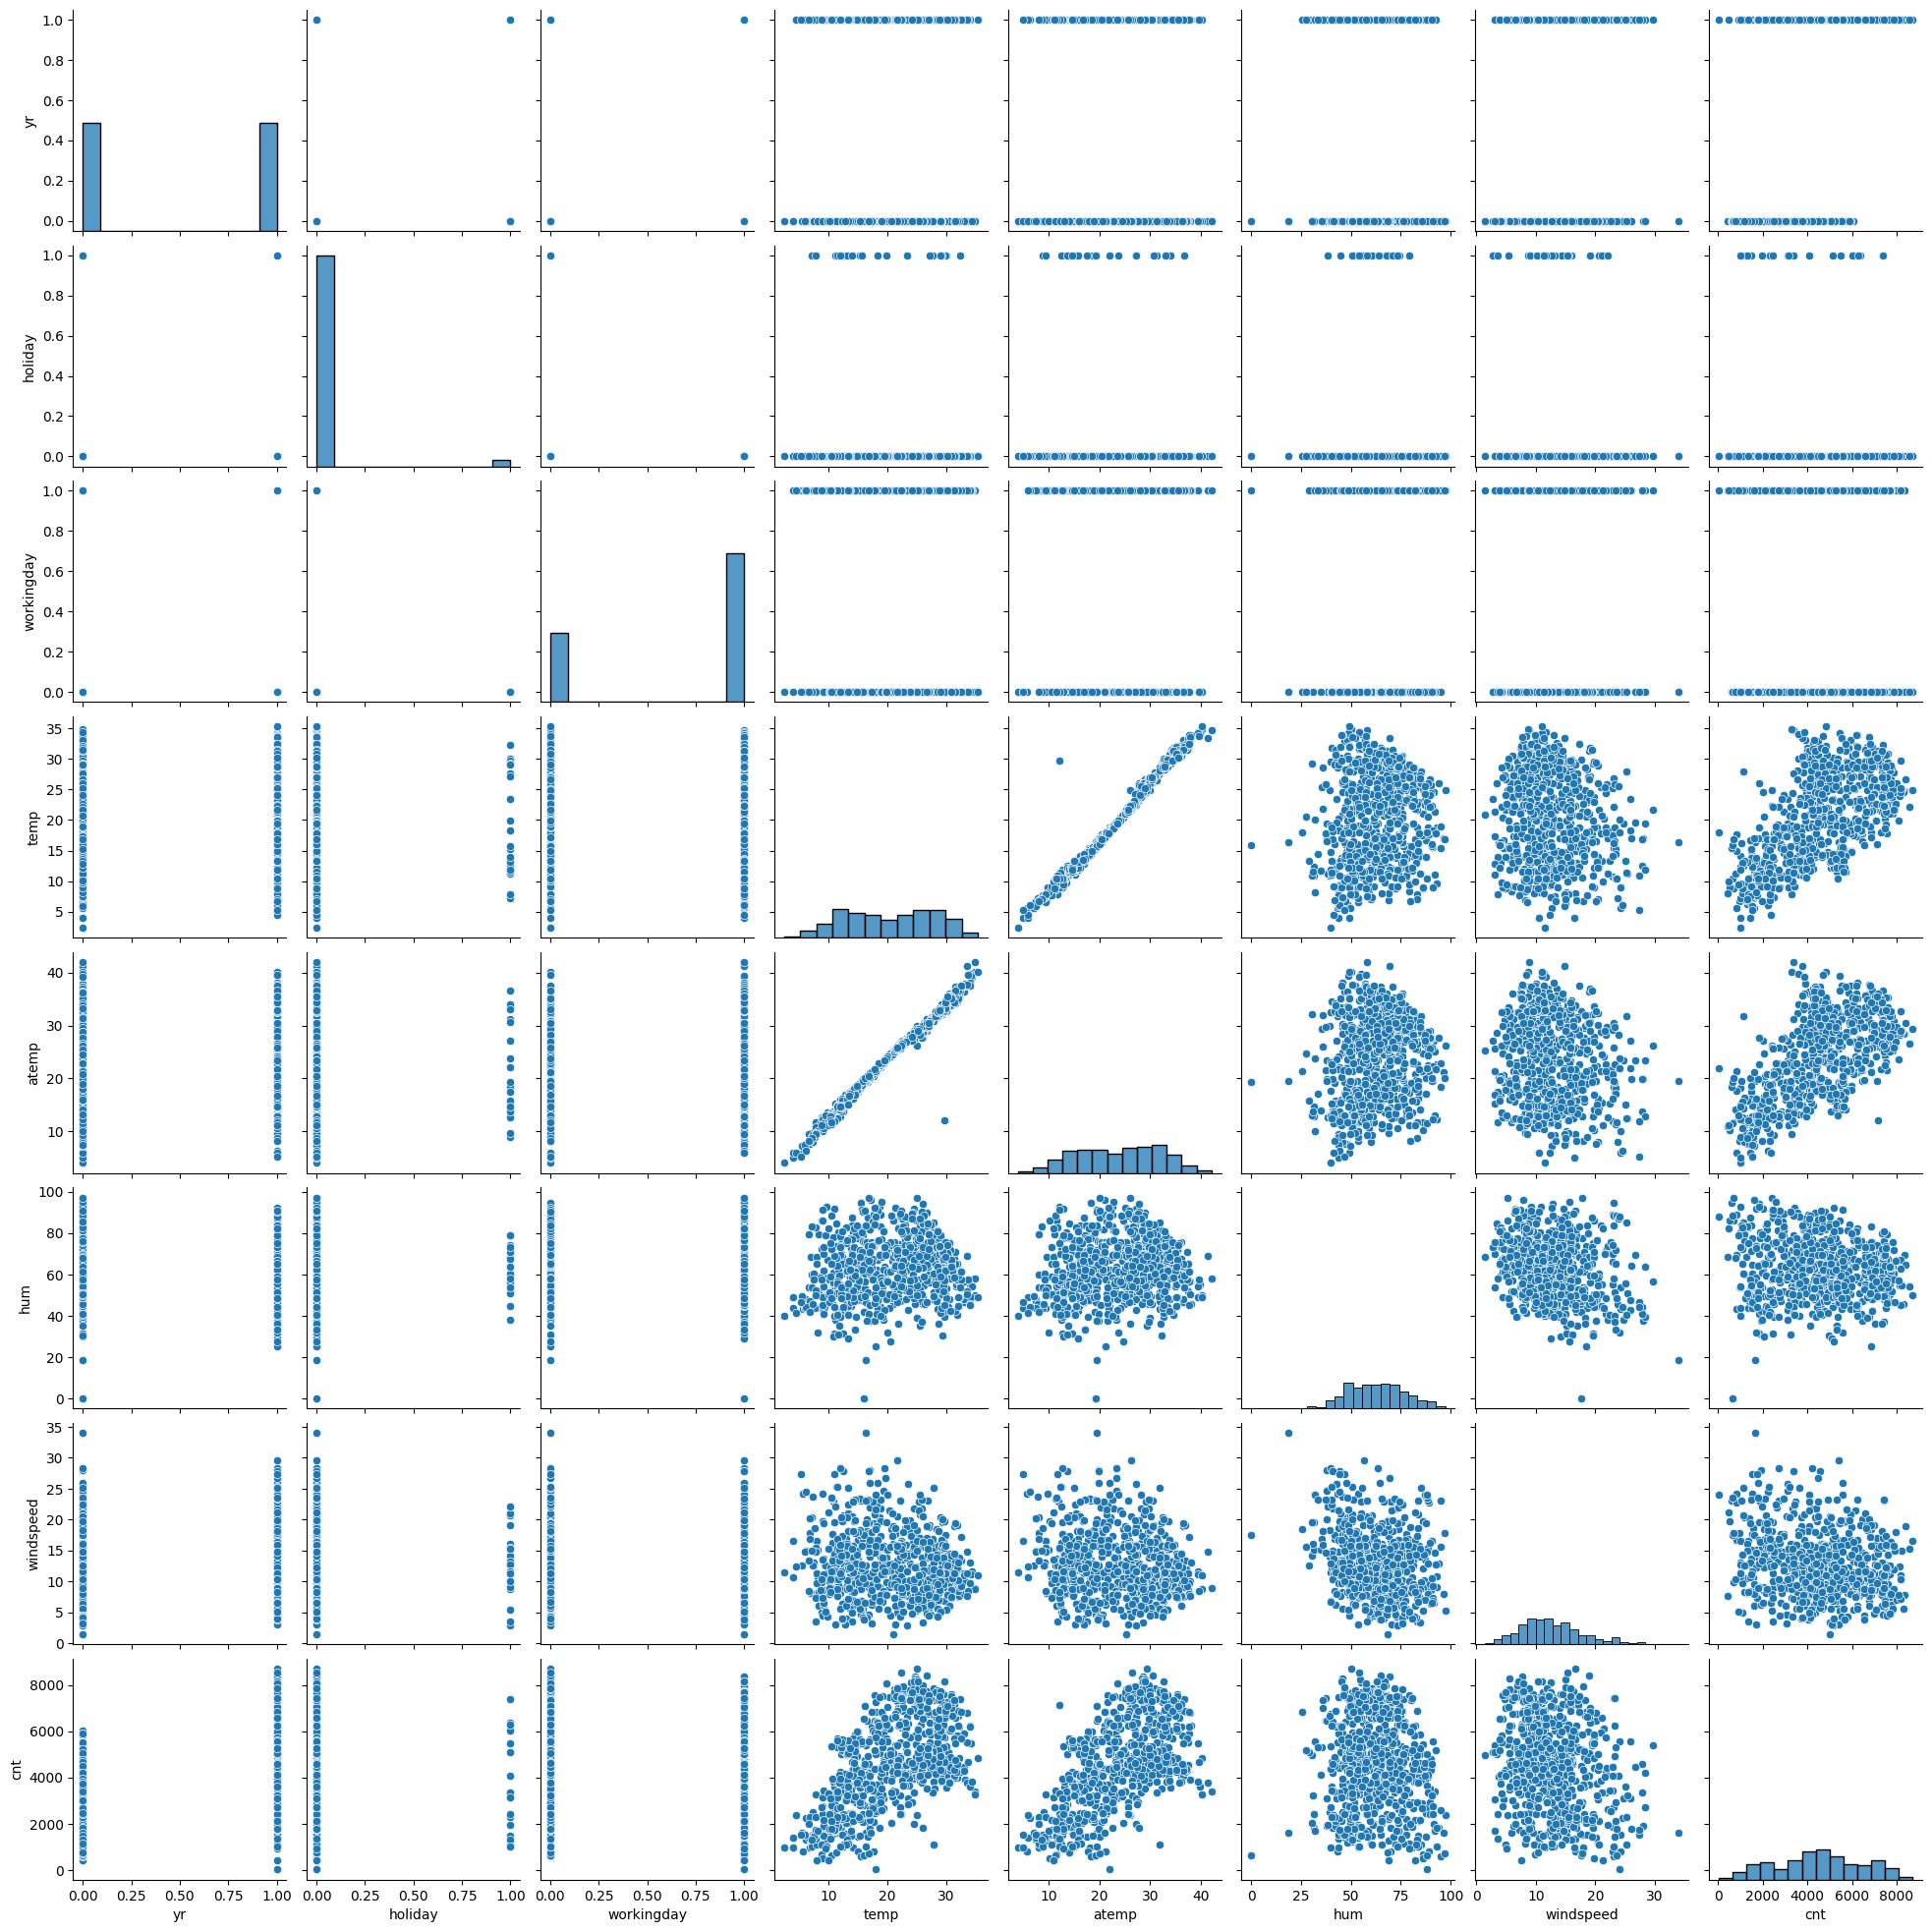

In [10]:
# Find the Correlation between the Numerical Variable
plt.figure(figsize=(20, 15))
sns.pairplot(df)
plt.show()

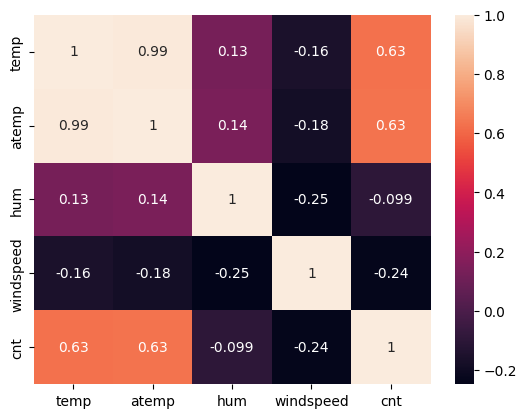

In [11]:
# Checking continuous variables relationship with each other
sns.heatmap(
    df[["temp", "atemp", "hum", "windspeed", "cnt"]].corr(), annot=True
)
plt.show()

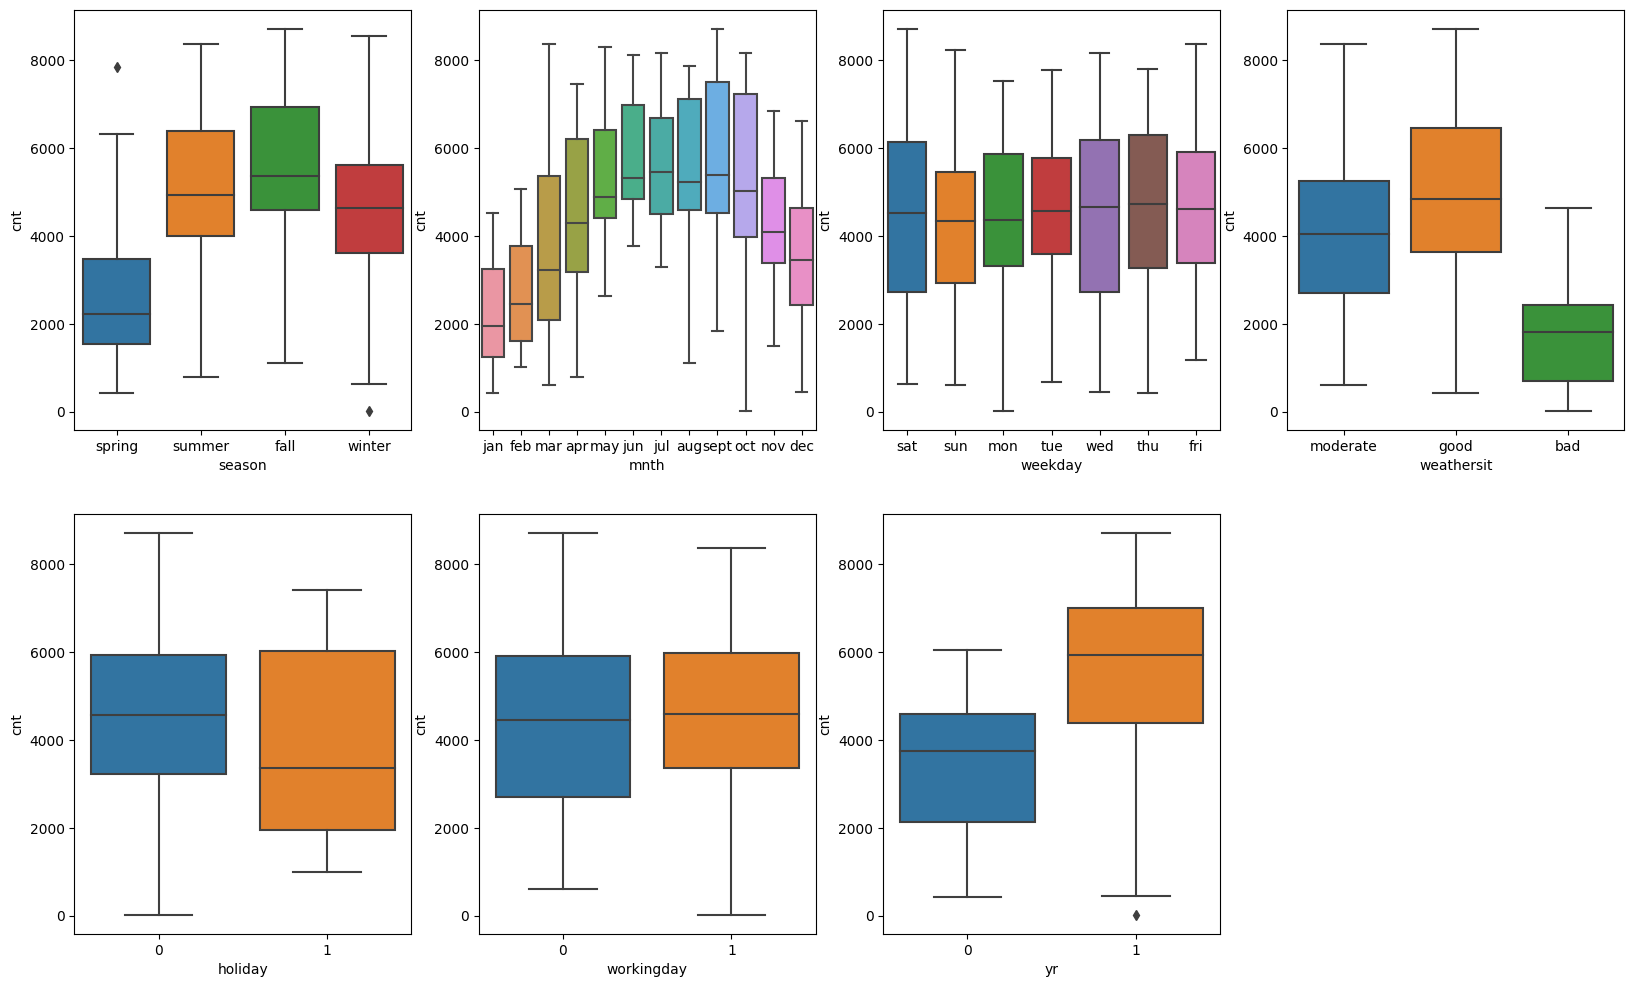

In [12]:
# visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x="season", y="cnt", data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x="mnth", y="cnt", data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x="weekday", y="cnt", data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x="weathersit", y="cnt", data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x="holiday", y="cnt", data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x="workingday", y="cnt", data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x="yr", y="cnt", data=df)
plt.show()

In [13]:
def gen_barplot(column_name):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column_name, y="cnt", data=df)
    plt.subplot(1, 2, 2)
    sns.barplot(x=column_name, y="cnt", data=df, hue="yr")
    plt.legend(labels=["2018", "2019"])
    plt.show()

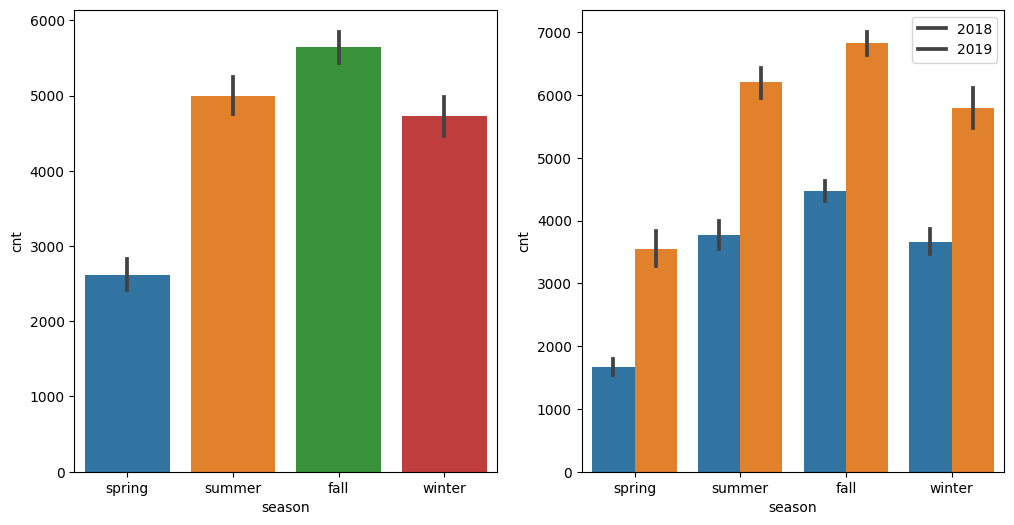

In [14]:
gen_barplot("season")

season fall have more number of booking in compare to other seasons, also booking count incresed from 2018 to 2019

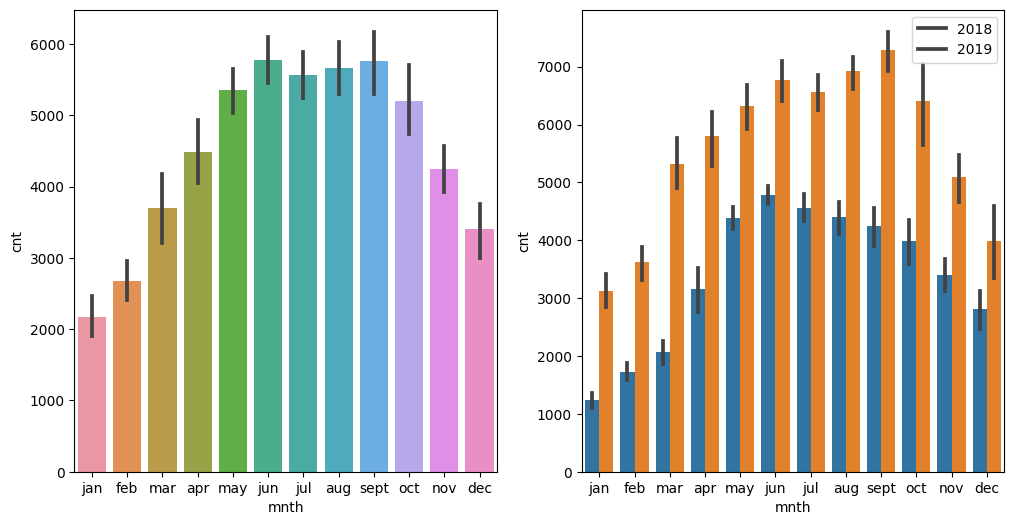

In [15]:
# plotting visualization for month column
gen_barplot("mnth")

Most of the bookings has been done during the month of may to oct.
Trend increased starting of the year till mid of the year and then it started decreasing till end of year. Number of booking for each month seems to have increased from 2018 to 2019.

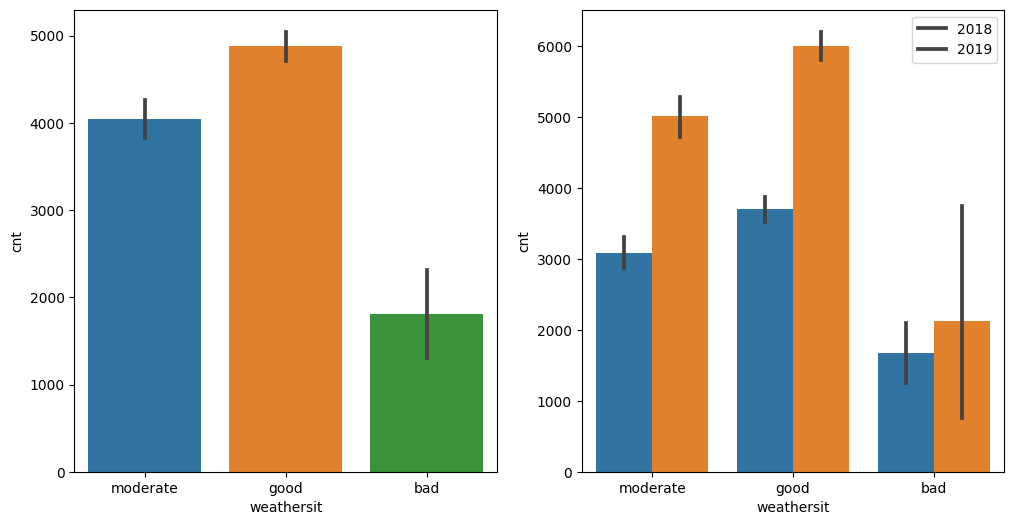

In [16]:
# plotting visualization for weathersit column

gen_barplot("weathersit")

Good weather attracted more booking. And booking increased for each weather situation in 2019.

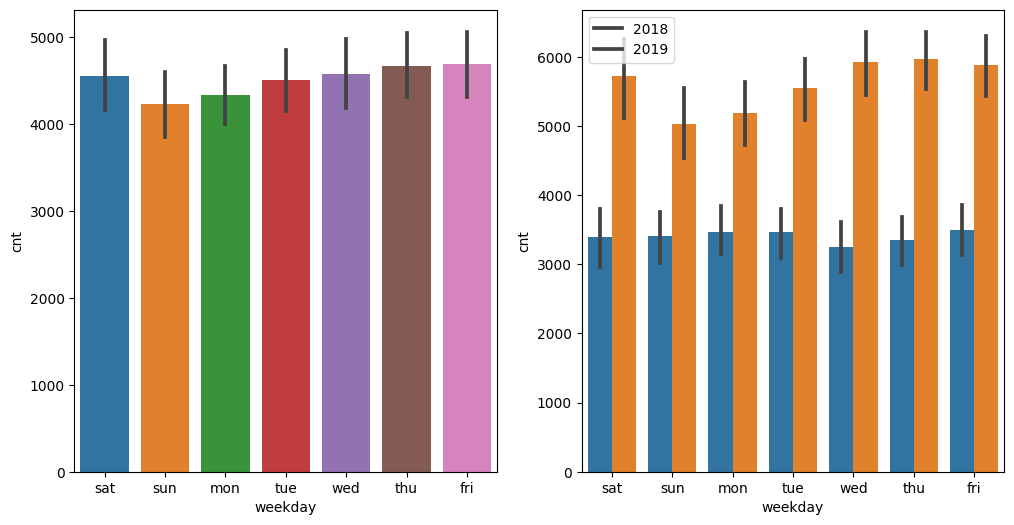

In [17]:
# plotting visualization for weekday column

gen_barplot("weekday")

Days towards last of week i.e Thu, Fri, and Sat have more number of bookings as compared to the start of the week.

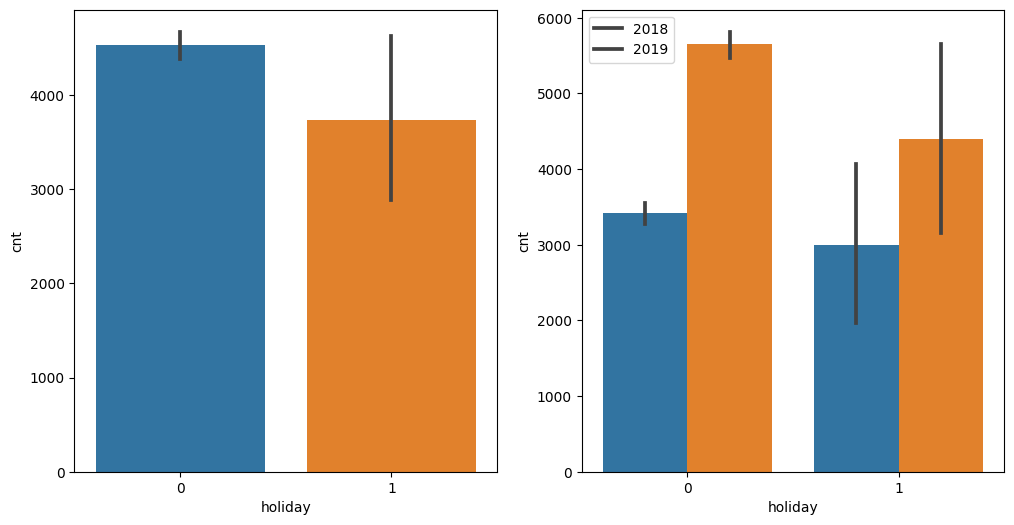

In [18]:
# plotting visualization for holiday column

gen_barplot("holiday")

More booking on Holidays, and in compare to 2018, 2019 have more bookings

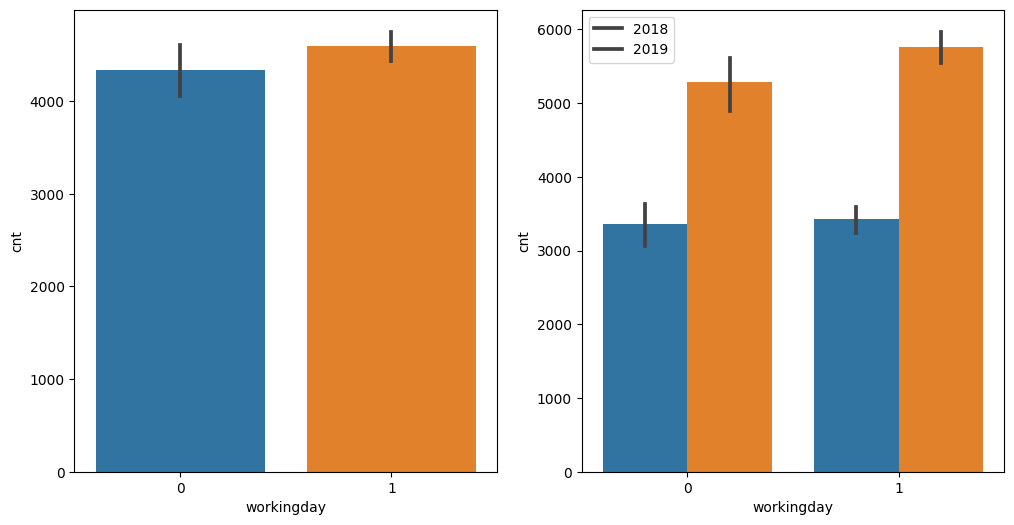

In [19]:
# plotting visualization for workingday column
gen_barplot("workingday")

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

## Data Preparation

In [21]:
# Creating dummy variable for month, weekday, weathersit and season variables.

months_df = pd.get_dummies(df.mnth, drop_first=True)
weekdays_df = pd.get_dummies(df.weekday, drop_first=True)
weathersit_df = pd.get_dummies(df.weathersit, drop_first=True)
seasons_df = pd.get_dummies(df.season, drop_first=True)

In [27]:
# Merging the data with the dummy variable dataset.

df_new = pd.concat(
    [df, months_df, weekdays_df, weathersit_df, seasons_df], axis=1
)
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,1,0,0
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,...,0,0,0,1,0,1,0,1,0,0
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,1,1,0,1,0,0


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  jul         730 non-null    uint8  
 17  jun         730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

In [29]:
# dropping unnecessary columns

df_new.drop(["season", "mnth", "weekday", "weathersit"], axis=1, inplace=True)
df_new.shape

(730, 30)

### Splitting dataset into traning and test

In [30]:
# splitting the dataframe into Train and Test

df_train, df_test = train_test_split(df_new, train_size=0.7, random_state=100)

In [31]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [33]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
# describing the dataset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


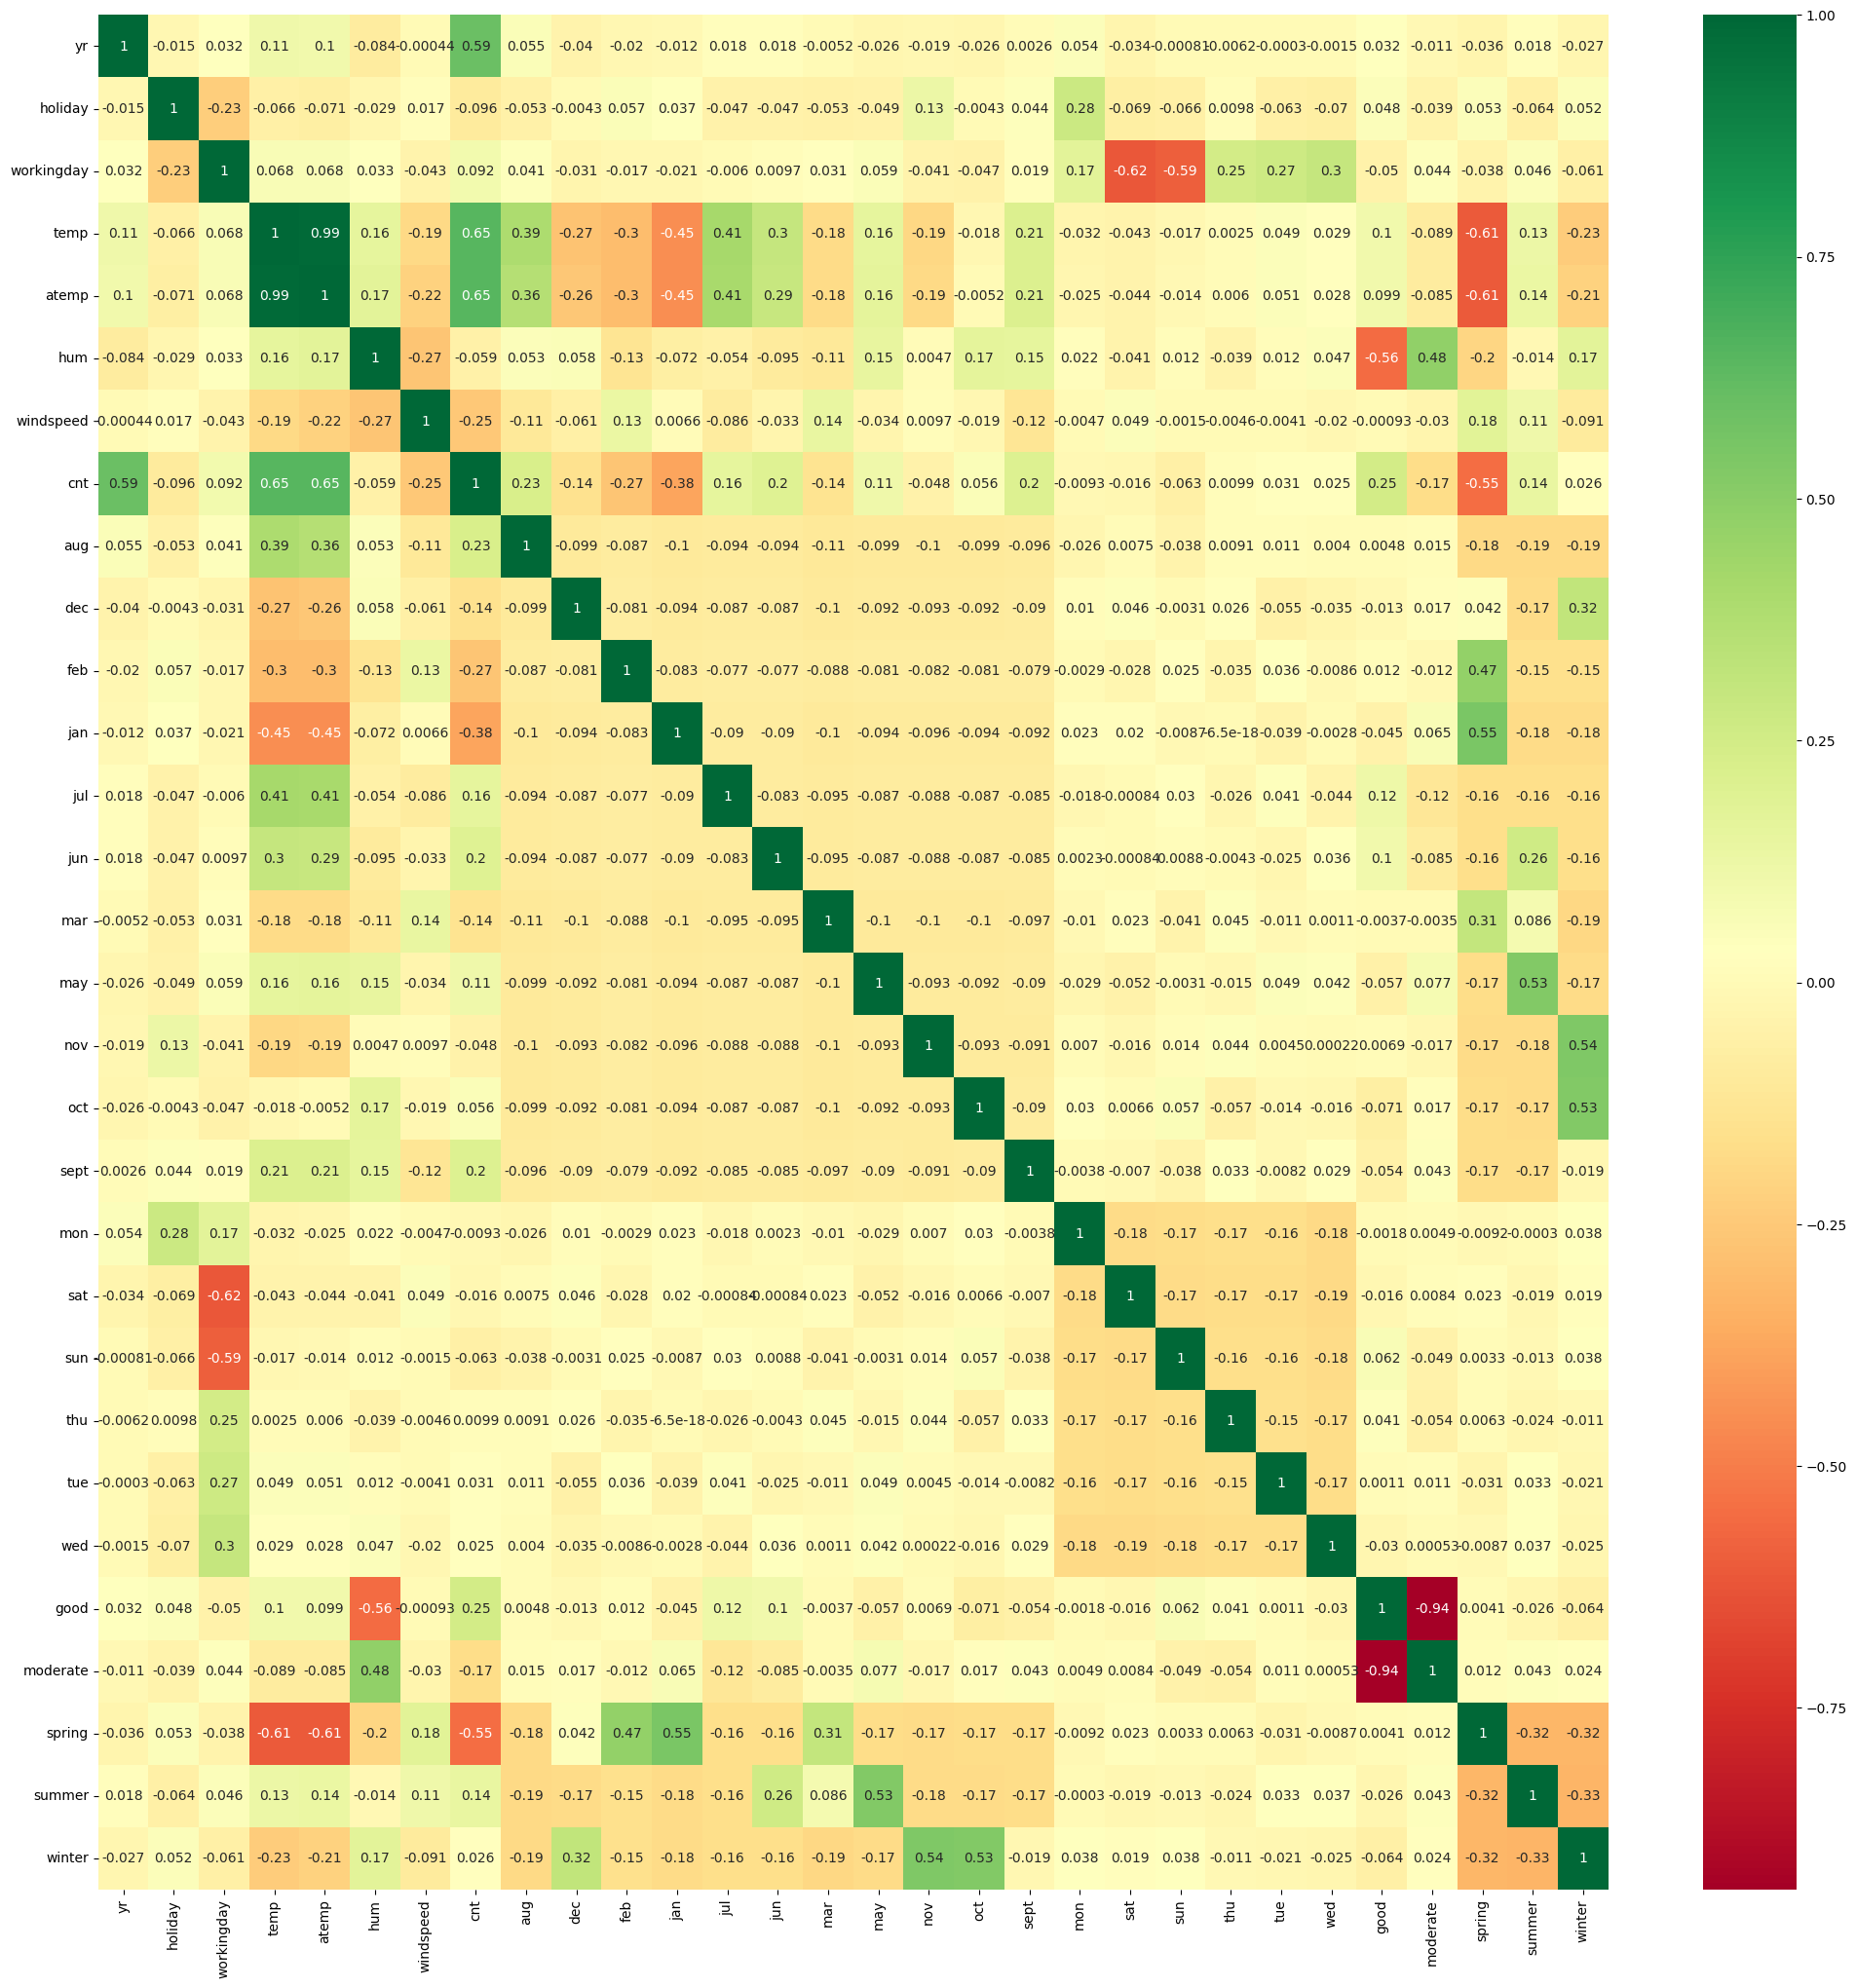

In [36]:
# check the correlation coefficients

plt.figure(figsize=(25, 25))
sns.heatmap(df_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.


In [37]:
# Building the Linear Model

y_train = df_train.pop("cnt")
X_train = df_train

In [42]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [43]:
# List of variables selected in top 15 list

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 12),
 ('sept', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 13),
 ('good', True, 1),
 ('moderate', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [44]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jul',
       'sept', 'sat', 'sun', 'good', 'moderate', 'spring', 'summer', 'winter'],
      dtype='object')


In [45]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [46]:
# Generic function to calculate VIF of variables


def calculateVIF(df):
    vif = pd.DataFrame()
    vif["Features"] = df.columns
    vif["VIF"] = [
        variance_inflation_factor(df.values, i) for i in range(df.shape[1])
    ]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [47]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [48]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,94.54
8,sat,22.15
9,sun,21.46
10,good,10.25
11,moderate,8.87
12,spring,5.02
1,holiday,4.66
3,temp,3.62
14,winter,3.49
13,summer,2.62


## Building a linear model

In [49]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        22:06:16   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.038      0.093      0.9

In [50]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(["sun"], axis=1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
4,hum,25.02
3,temp,21.44
9,good,14.44
10,moderate,8.92
11,spring,5.53
2,workingday,5.41
5,windspeed,4.66
13,winter,4.03
12,summer,3.19
0,yr,2.09


In [51]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        22:08:17   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.048     -0.100      0.9

In [52]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(["holiday"], axis=1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,24.99
2,temp,21.42
8,good,14.31
9,moderate,8.87
10,spring,5.51
1,workingday,4.79
4,windspeed,4.65
12,winter,4.01
11,summer,3.19
0,yr,2.09


In [53]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.54e-191
Time:                        22:11:55   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0136      0.048     -0.281      0.7

### Linearity

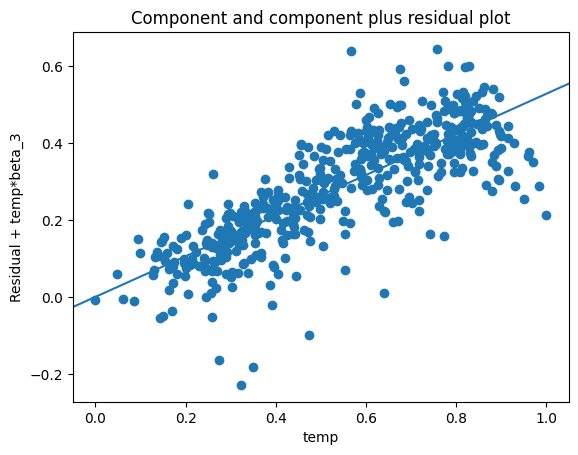

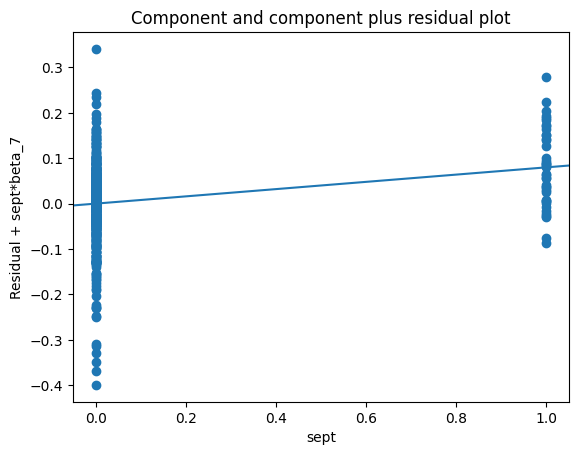

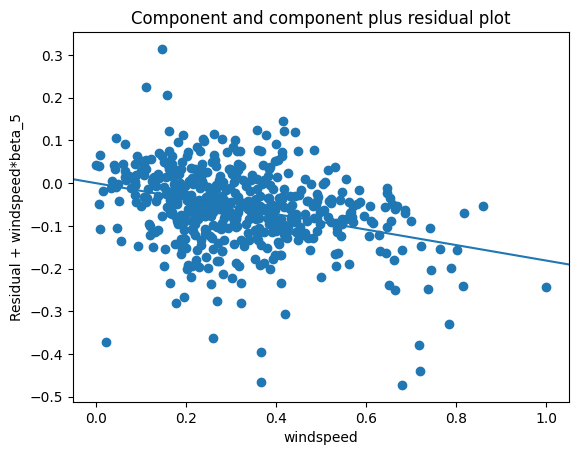

In [54]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_3, "temp")
plt.show()

sm.graphics.plot_ccpr(lr_3, "sept")
plt.show()

sm.graphics.plot_ccpr(lr_3, "windspeed")
plt.show()

### Homoscedasticity

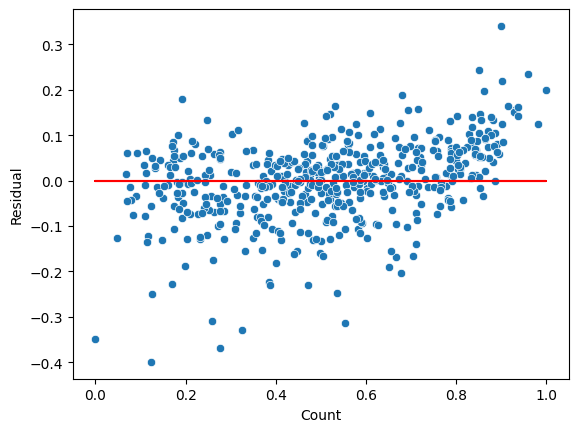

In [56]:
y_train_pred = lr_3.predict(X_train_lm_3)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train, (y_train - y_train), "-r")
plt.xlabel("Count")
plt.ylabel("Residual")
plt.show()

No visible pattern observed

## Prediction

In [58]:
# Applying scaling on the test dataset

num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,good,moderate,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,1,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,1,0,0,1,0


In [59]:
y_test = df_test.pop("cnt")
X_test = df_test

In [61]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_3 = sm.add_constant(X_test)

In [62]:
y_pred = lr_3.predict(X_test_lm_3)

In [63]:
r2 = r2_score(y_test, y_pred)
round(r2, 4)

0.8177

## Model Evaluation

Text(0, 0.5, 'y_pred')

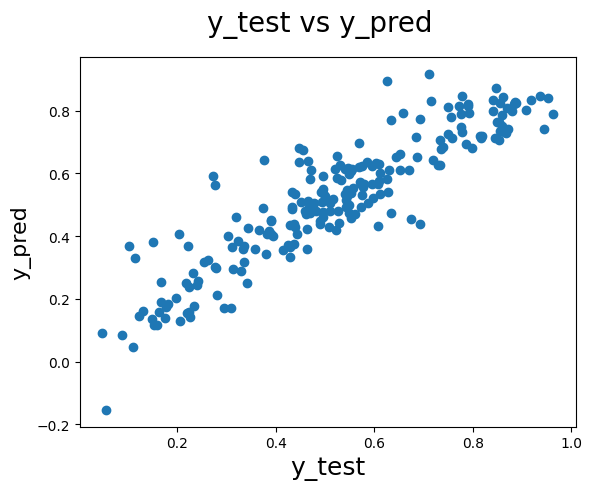

In [64]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle("y_test vs y_pred", fontsize=20)
plt.xlabel("y_test", fontsize=18)
plt.ylabel("y_pred", fontsize=16)

In [65]:
round(lr_3.params, 4)

const        -0.0136
yr            0.2300
workingday    0.0518
temp          0.5278
hum          -0.1594
windspeed    -0.1815
jul          -0.0535
sept          0.0799
sat           0.0619
good          0.2442
moderate      0.1881
spring       -0.0566
summer        0.0541
winter        0.0983
dtype: float64

In [66]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(
    1
    - (1 - r2)
    * (X_test.shape[0] - 1)
    / (X_test.shape[0] - X_test.shape[1] - 1),
    4,
)
print(adjusted_r2)

0.8062


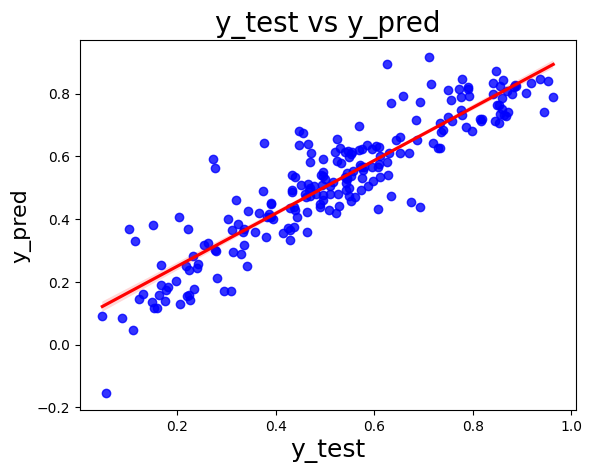

In [67]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(
    x=y_test,
    y=y_pred,
    ci=68,
    fit_reg=True,
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)
plt.title("y_test vs y_pred", fontsize=20)
plt.xlabel("y_test", fontsize=18)
plt.ylabel("y_pred", fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.846
- Test dataset R^2           : 0.8177
- Train dataset Adjusted R^2 : 0.841
- Test dataset Adjusted R^2  : 0.8062

Demands of bikes depends on following variable
- year
- workingday
- temp
- hum
- windspeed
- jul
- sept
- sat
- good
- moderate
- spring
- summer
- winter 